In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/projectes/customer_segment/Mall_Customers.csv")
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
x=data.iloc[:,[3,4]].values

WCSS   >- within cluster sum of square

In [8]:
WCSS=[]

for i in range(1,11):
  Kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
  Kmeans.fit(x)
  WCSS.append(Kmeans.inertia_)


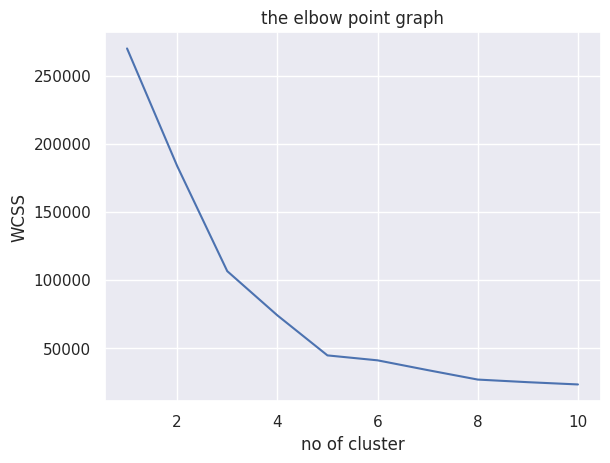

In [9]:
sns.set()
plt.plot(range(1,11),WCSS)
plt.title('the elbow point graph')
plt.xlabel('no of cluster')
plt.ylabel('WCSS')
plt.show()

optimal num of cluster is =5

In [10]:
 Kmeans= KMeans(n_clusters=5, init='k-means++', random_state=0)

 #return a label for each data points based on their cluster
 y=Kmeans.fit_predict(x)
 print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


visualizing cluster  

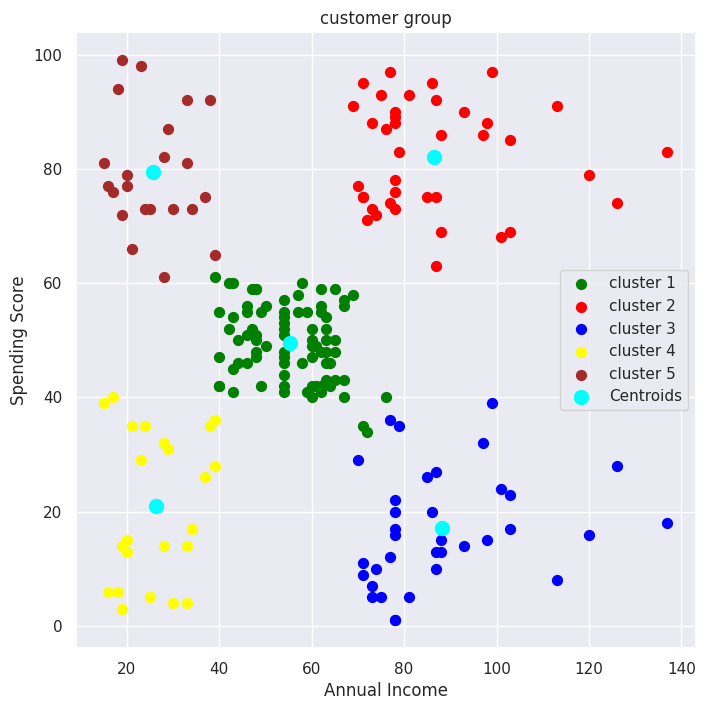

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='blue', label='cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='yellow', label='cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='brown', label='cluster 5')
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroids')

plt.legend()
plt.title("customer group")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
